In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('post-election-violence-data.csv')
df.drop(0, inplace=True)

In [3]:
df['event_date'] = pd.to_datetime(df['event_date'])
df.index = df['event_date']

In [4]:
df['fatalities'] =df['fatalities'].apply(lambda num: int(num))

In [5]:
df2017 =df.loc['2017-12-31':'2017-01-01']

In [6]:
df2017.groupby(df2017['event_type'])['fatalities'].sum()

event_type
Battles                       225
Explosions/Remote violence     80
Protests                       14
Riots                         127
Strategic developments          0
Violence against civilians    299
Name: fatalities, dtype: int64

Text(0, 0.5, ' ')

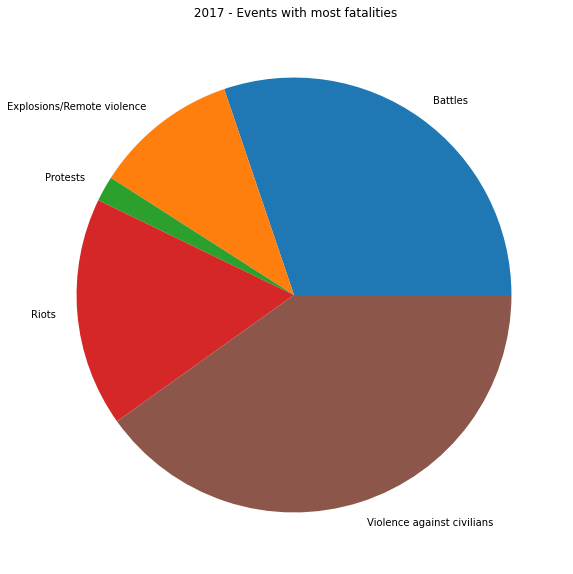

In [7]:
df2017.groupby(df2017['event_type'])['fatalities'].sum().plot(kind='pie',figsize=(14,10))
plt.title(' 2017 - Events with most fatalities')
plt.ylabel(' ')

In [8]:
df2017.groupby([df2017['event_type'], df2017['sub_event_type']])['fatalities'].sum()

event_type                  sub_event_type                     
Battles                     Armed clash                            211
                            Government regains territory             4
                            Non-state actor overtakes territory     10
Explosions/Remote violence  Air/drone strike                         0
                            Grenade                                  1
                            Remote explosive/landmine/IED           79
                            Shelling/artillery/missile attack        0
Protests                    Excessive force against protesters      14
                            Peaceful protest                         0
                            Protest with intervention                0
Riots                       Mob violence                            58
                            Violent demonstration                   69
Strategic developments      Arrests                                  0
             

Text(0, 0.5, ' ')

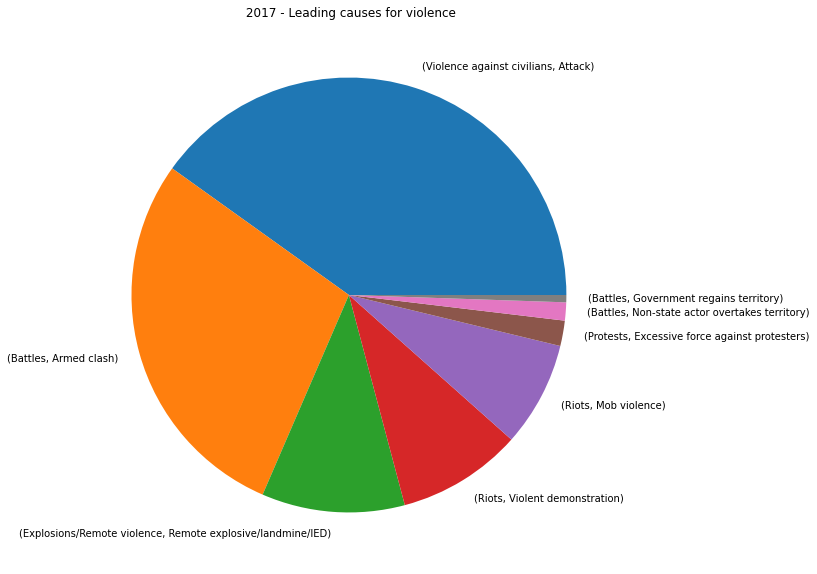

In [13]:
df2017.groupby([df2017['event_type'], df2017['sub_event_type']])['fatalities'].sum().sort_values(ascending=False)[:8].plot(kind='pie', figsize=(14,10))
plt.title(' 2017 - Leading causes for violence')
plt.ylabel(' ')

Text(0.5, 0, 'Number of fatalities')

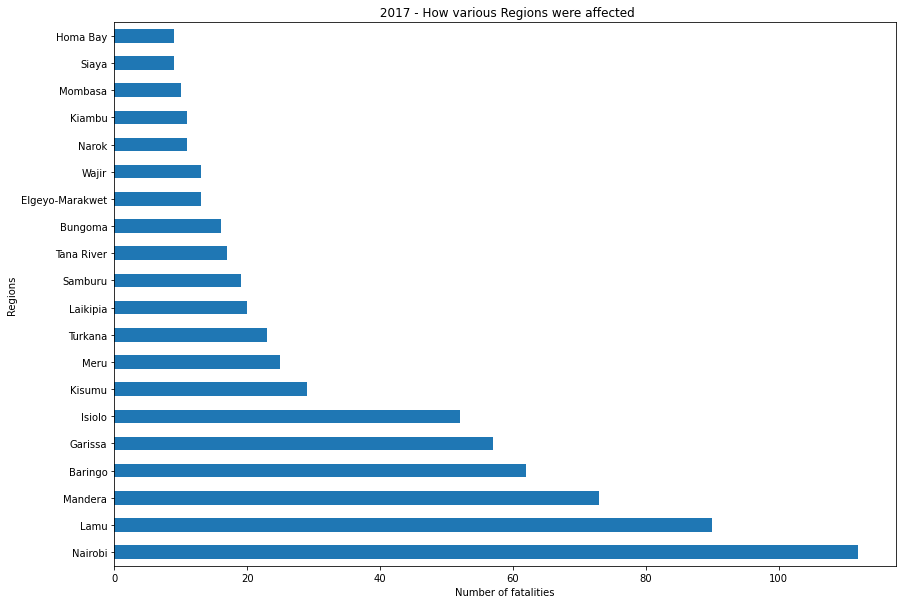

In [10]:
df2017.groupby(df2017['admin1'])['fatalities'].sum().sort_values(ascending=False)[:20].plot(kind='barh', figsize=(14,10))
plt.title(' 2017 - How various Regions were affected')
plt.ylabel('Regions')
plt.xlabel('Number of fatalities')

In [11]:
regions = df2017.groupby([df2017['admin1'],df2017['sub_event_type']])['fatalities'].sum()

admin1   sub_event_type                    
Turkana  Armed clash                            6
         Attack                                15
         Mob violence                           2
         Violent demonstration                  0
Nakuru   Attack                                 3
         Mob violence                           3
         Peaceful protest                       0
         Protest with intervention              0
         Violent demonstration                  0
Nairobi  Abduction/forced disappearance         0
         Armed clash                           10
         Arrests                                0
         Attack                                31
         Change to group/activity               0
         Excessive force against protesters     7
         Mob violence                          20
         Peaceful protest                       0
         Protest with intervention              0
         Violent demonstration                 44
Name: 

Text(0.5, 0, 'Number of fatalities')

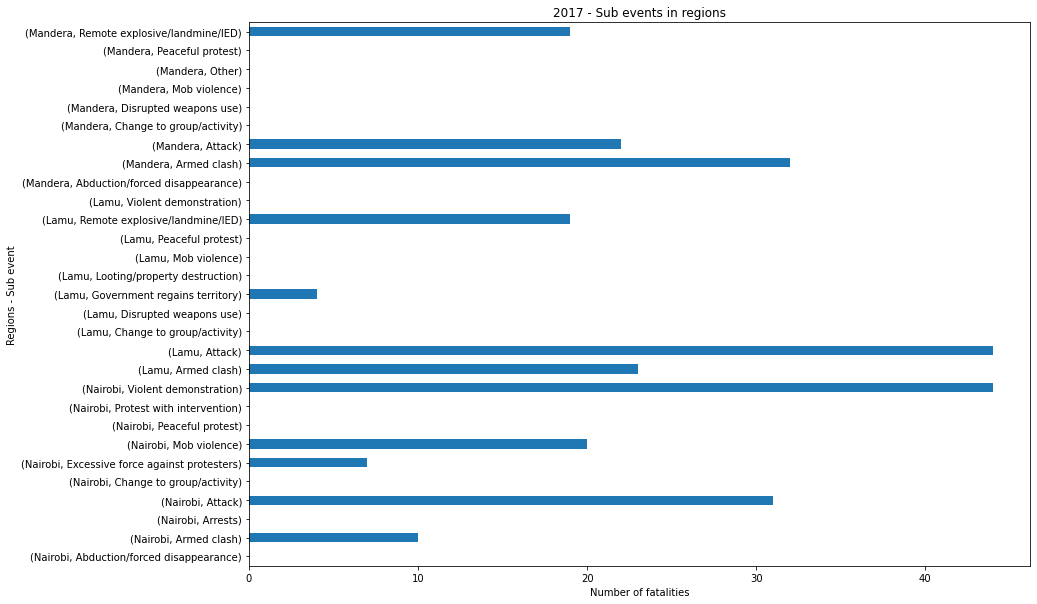

In [15]:
regions[['Nairobi', 'Lamu', 'Mandera']].plot(kind='barh', figsize=(14,10))
plt.title('2017 - Sub events in regions')
plt.ylabel('Regions - Sub event')
plt.xlabel('Number of fatalities')
